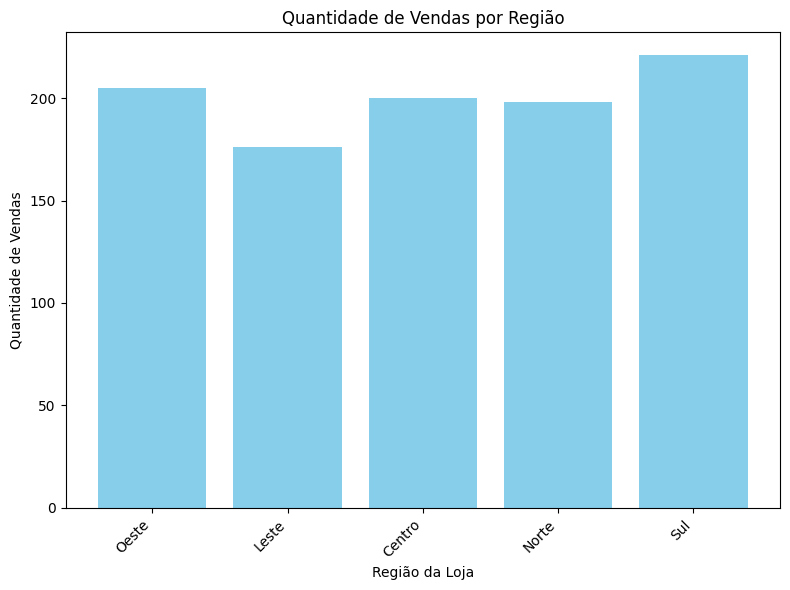

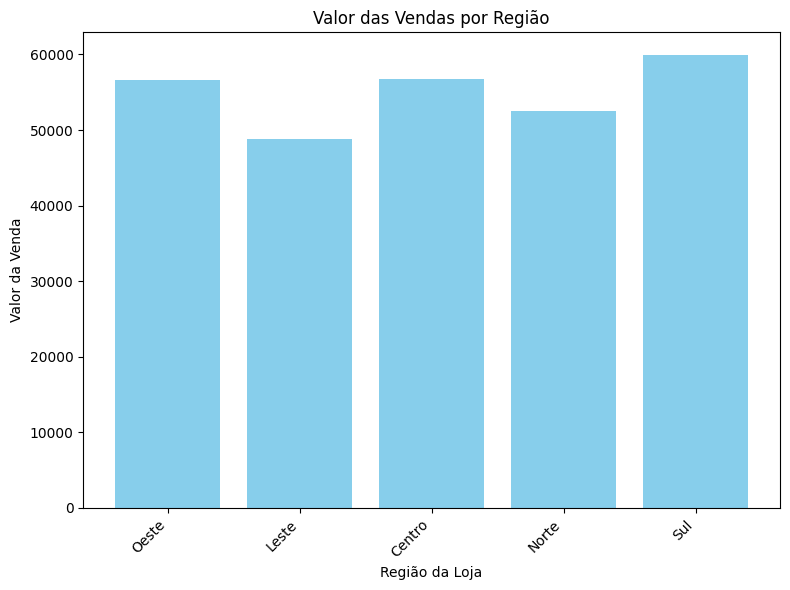


    valores  quantidades
0  56666.56          205
1  48747.81          176
2  56761.91          200
3  52466.22          198
4  59926.42          221

Coeficiente Correlacional Spearman: 0.8999999999999998
Conforme podemos avaliar, o coeficiente correlacional possui um valor positivo alto, o que indica uma forte relação entre as variáveis.



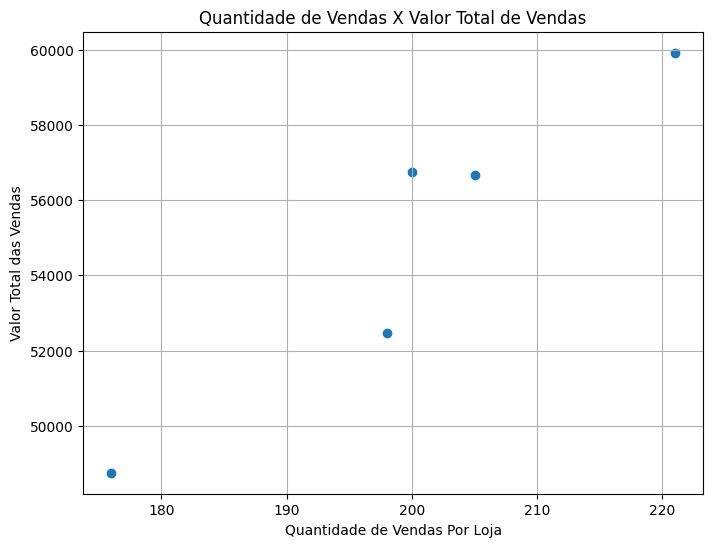

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from collections import defaultdict, Counter
from scipy.stats import spearmanr

data = []
valorVenda = []
tipoCalcado = []
sexoCliente = []
faixaEtaria = []
regiaoLoja = []

#Extraindo dados
with open('dados_vendas.csv', 'r') as csv:
  next(csv)
  for l in csv:
    cols = l.strip().split(',')
    data.append(cols[0])
    valorVenda.append(float(cols[1]))
    tipoCalcado.append(cols[2])
    sexoCliente.append(cols[3])
    faixaEtaria.append(cols[4])
    regiaoLoja.append(cols[5])

#Gráfico da Quantidade de Vendas por Região
#Contar a quantidade de vendas por região
quantidadeVendasPorRegiao = Counter(regiaoLoja)

# Preparar dados para o gráfico
regioes = list(quantidadeVendasPorRegiao.keys())
quantidades = list(quantidadeVendasPorRegiao.values())

# Criar o gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(regioes, quantidades, color='skyblue')

# Configurar rótulos e título
plt.xlabel('Região da Loja')
plt.ylabel('Quantidade de Vendas')
plt.title('Quantidade de Vendas por Região')

# Ajustar layout e exibir o gráfico
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print()

#Gráfico do Valor das Vendas por Região
#Calculando o valor total das vendas por região
vendasPorRegiao = defaultdict(float)
for valor, regiao in zip(valorVenda, regiaoLoja):
  vendasPorRegiao[regiao] += valor

#Preparando dados
regioes = list(vendasPorRegiao.keys())
valores = list(vendasPorRegiao.values())

#Criando gráfico
plt.figure(figsize=(8, 6))
bar_plot = plt.bar(regioes, valores, color='skyblue')

plt.xlabel('Região da Loja')
plt.ylabel('Valor da Venda')
plt.title('Valor das Vendas por Região')

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

print()

#Relacionando a Quantidade de Vendas com o Valor Total de Vendas por Região
df = pd.DataFrame({
    'valores': vendasPorRegiao.values(),
    'quantidades': quantidadeVendasPorRegiao.values()
    })

print(df)
print()

coef_spearman, p_valor = spearmanr(df['quantidades'], df['valores'])

print('Coeficiente Correlacional Spearman: ' + str(coef_spearman))
print('Conforme podemos avaliar, o coeficiente correlacional possui um valor positivo alto, o que indica uma forte relação entre as variáveis.')

print()

#Gráfico de Dispersão
plt.figure(figsize=(8, 6))
plt.scatter(quantidades, valores)

plt.xlabel('Quantidade de Vendas Por Loja')
plt.ylabel('Valor Total das Vendas')

plt.title('Quantidade de Vendas X Valor Total de Vendas')

plt.grid(True)

plt.show()

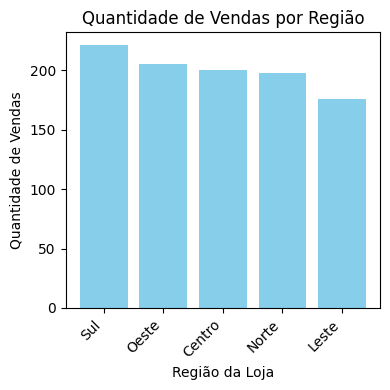

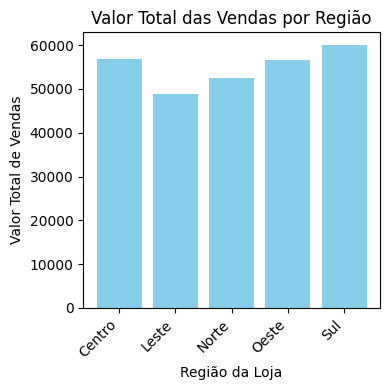


                valor_total  quantidade_vendas
Regiao da Loja                                
Centro             56761.91                200
Leste              48747.81                176
Norte              52466.22                198
Oeste              56666.56                205
Sul                59926.42                221
Coeficiente Correlacional Spearman: 0.8999999999999998



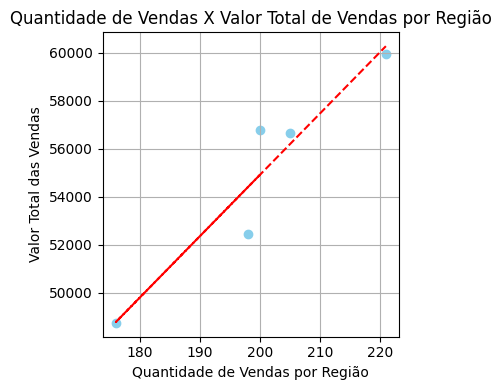

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from collections import defaultdict, Counter
from scipy.stats import spearmanr
import numpy as np

# Função para extrair dados
def extrair_dados(filepath):
    df = pd.read_csv(filepath)
    return df

# Função para criar gráfico de barras
def criar_grafico_barras(labels, valores, xlabel, ylabel, titulo, figsize=(4, 4)):
    plt.figure(figsize=figsize)
    plt.bar(labels, valores, color='skyblue')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(titulo)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    print()

# Função para calcular a correlação de Spearman
def calcular_correlacao(df, col_x, col_y):
    coef_spearman, p_valor = spearmanr(df[col_x], df[col_y])
    print(f'Coeficiente Correlacional Spearman: {coef_spearman}')
    print()
    return coef_spearman, p_valor

# Função para criar gráfico de dispersão
def criar_grafico_dispersao(x, y, xlabel, ylabel, titulo):
    plt.figure(figsize=(4, 4))
    plt.scatter(x, y, color='skyblue')

    # Adicionar linha de tendência
    m, b = np.polyfit(x, y, 1)
    plt.plot(x, m * x + b, color='red', linestyle='--')

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(titulo)
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    print()

# Carregar dados
df = extrair_dados('dados_vendas.csv')

# Quantidade de Vendas por Região
quantidade_vendas_por_regiao = df['Regiao da Loja'].value_counts()
criar_grafico_barras(
    labels=quantidade_vendas_por_regiao.index,
    valores=quantidade_vendas_por_regiao.values,
    xlabel='Região da Loja',
    ylabel='Quantidade de Vendas',
    titulo='Quantidade de Vendas por Região'
)

# Valor Total das Vendas por Região
vendas_por_regiao = df.groupby('Regiao da Loja')['Valor da Venda'].sum()
criar_grafico_barras(
    labels=vendas_por_regiao.index,
    valores=vendas_por_regiao.values,
    xlabel='Região da Loja',
    ylabel='Valor Total de Vendas',
    titulo='Valor Total das Vendas por Região'
)

# Análise de Correlação entre Quantidade de Vendas e Valor Total por Região
# Criando DataFrame resumido com dados agregados
df_agrupado = pd.DataFrame({
    'valor_total': vendas_por_regiao,
    'quantidade_vendas': quantidade_vendas_por_regiao
})

print(df_agrupado)

# Calcular correlação de Spearman
calcular_correlacao(df_agrupado, 'valor_total', 'quantidade_vendas')

# Gráfico de Dispersão entre Quantidade de Vendas e Valor Total de Vendas
criar_grafico_dispersao(
    x=df_agrupado['quantidade_vendas'],
    y=df_agrupado['valor_total'],
    xlabel='Quantidade de Vendas por Região',
    ylabel='Valor Total das Vendas',
    titulo='Quantidade de Vendas X Valor Total de Vendas por Região'
)

Coeficiente Correlacional Spearman: 0.8999999999999998



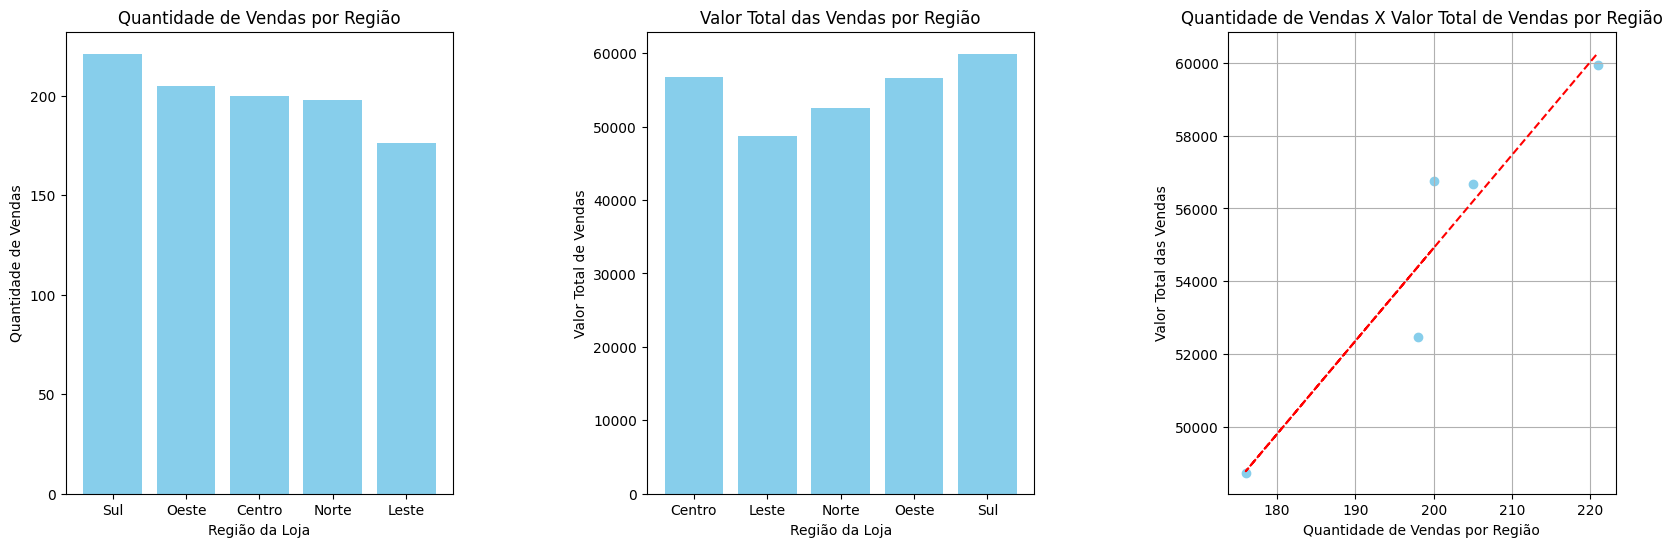

In [144]:
import matplotlib.pyplot as plt
import pandas as pd
from collections import defaultdict, Counter
from scipy.stats import spearmanr
import numpy as np

# Função para extrair dados
def extrair_dados(filepath):
    df = pd.read_csv(filepath)
    return df

# Função para criar gráfico de barras
def criar_grafico_barras(ax, labels, valores, xlabel, ylabel, titulo):
    ax.bar(labels, valores, color='skyblue')
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(titulo)

# Função para calcular a correlação de Spearman
def calcular_correlacao(df, col_x, col_y):
    coef_spearman, p_valor = spearmanr(df[col_x], df[col_y])
    print(f'Coeficiente Correlacional Spearman: {coef_spearman}')
    return coef_spearman, p_valor

# Função para criar gráfico de dispersão
def criar_grafico_dispersao(ax, x, y, xlabel, ylabel, titulo):
    ax.scatter(x, y, color='skyblue')
    # Adicionar linha de tendência
    m, b = np.polyfit(x, y, 1)
    ax.plot(x, m * x + b, color='red', linestyle='--')

    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(titulo)
    ax.grid(True)

# Carregar dados
df = extrair_dados('dados_vendas.csv')

# Quantidade de Vendas por Região
quantidade_vendas_por_regiao = df['Regiao da Loja'].value_counts()

# Valor Total das Vendas por Região
vendas_por_regiao = df.groupby('Regiao da Loja')['Valor da Venda'].sum()

# Análise de Correlação entre Quantidade de Vendas e Valor Total por Região
# Criando DataFrame resumido com dados agregados
df_agrupado = pd.DataFrame({
    'valor_total': vendas_por_regiao,
    'quantidade_vendas': quantidade_vendas_por_regiao
})

# Calcular correlação de Spearman
calcular_correlacao(df_agrupado, 'valor_total', 'quantidade_vendas')
print()

# Criando a figura com 1 linha e 3 colunas para os 3 gráficos
fig, axs = plt.subplots(1, 3, figsize=(20, 6))

# Criar gráficos
criar_grafico_barras(axs[0], quantidade_vendas_por_regiao.index, quantidade_vendas_por_regiao.values,
                     'Região da Loja', 'Quantidade de Vendas', 'Quantidade de Vendas por Região')

criar_grafico_barras(axs[1], vendas_por_regiao.index, vendas_por_regiao.values,
                     'Região da Loja', 'Valor Total de Vendas', 'Valor Total das Vendas por Região')

criar_grafico_dispersao(axs[2], df_agrupado['quantidade_vendas'], df_agrupado['valor_total'],
                        'Quantidade de Vendas por Região', 'Valor Total das Vendas',
                        'Quantidade de Vendas X Valor Total de Vendas por Região')

# Ajuste de layout e espaçamento entre gráficos
plt.subplots_adjust(wspace=0.5)  # Define o espaço horizontal entre gráficos
plt.show()
